In [1]:
import numpy as np

from numba import njit
from time import time

In [2]:
def show(G):
    
    tmp = 'X | '
    for v in V:
        tmp += ' ' + v + ' '
    
    print(tmp)
    print('')
    
    for row in range(len(V)):
        
        tmp = V[row] + ' | '
        for col in range(Vsize):
            w = int(G[row][col])
            if w < 10 : tmp +=  ' ' + str(w) + ' '
            if 10 <= w < 100 : tmp +=  ' ' + str(w)
            
            
        print(tmp)

In [3]:
def show_path(path, V):
    tmp = '[show_path] Path is: '
    for v in path:
        tmp += str(V[v]) + ','
    print(tmp, ' .')

---

## Graph init

<img src="TestGraph.png">

In [4]:
Vsize = 10
Esize = 12

V = ['S', 'a', 'b', 'c', 'd', 'x', 'y', 'z', 'g', 'E']

In [5]:
G = np.zeros((Vsize, Vsize))

In [6]:
G[0][1] = 20
G[0][2] = 30

G[1][3] = 15
G[1][4] = 10

G[2][4] = 15

G[3][5] = 15

G[4][6] = 30
G[4][7] = 10

G[5][8] = 20

G[6][9] = 25

G[7][9] = 20

G[8][9] = 5

In [7]:
show(G)

X |  S  a  b  c  d  x  y  z  g  E 

S |  0  20 30 0  0  0  0  0  0  0 
a |  0  0  0  15 10 0  0  0  0  0 
b |  0  0  0  0  15 0  0  0  0  0 
c |  0  0  0  0  0  15 0  0  0  0 
d |  0  0  0  0  0  0  30 10 0  0 
x |  0  0  0  0  0  0  0  0  20 0 
y |  0  0  0  0  0  0  0  0  0  25
z |  0  0  0  0  0  0  0  0  0  20
g |  0  0  0  0  0  0  0  0  0  5 
E |  0  0  0  0  0  0  0  0  0  0 


---

## MaxFlow

In [8]:
@njit
def iteration(G, F, V, _inf=99999999):
    
    Prev = np.full(Vsize, -1) # Prev node
    Q = [0] # Queue
    cursor = 0 # instead of popping elements of of the Q

    while cursor < Vsize:

        v_curr = Q[cursor]
        for v_ind, capacity in enumerate( G[v_curr] ):
            if F[v_curr, v_ind] < capacity and Prev[v_ind] == -1 and v_ind != v_curr:
                Q.append(v_ind)
                Prev[v_ind] = v_curr

        cursor += 1
        if cursor >= len(Q) : break

    # path reconstruction
    v_curr = Vsize - 1
    path = [v_curr]
    while True:
        v_prev = Prev[v_curr]
        v_curr = v_prev
        if v_curr == -1 : break
        path.append(v_curr)

    path = path[::-1]
    
    
    # path bottleneck
    bottleneck = _inf # float('inf') doesn't work with numba
    for i in range(len(path) - 1):
        v_curr = path[i]
        v_next = path[i+1]

        if G[v_curr, v_next] < bottleneck: 
            bottleneck = G[v_curr, v_next]
    if bottleneck == _inf : return F, True
    
    
    # path flow update
    for i in range(len(path) - 1):
        v_curr = path[i]
        v_next = path[i+1]

        F[v_curr, v_next] += bottleneck
        
    
    #print('')
    #print('----- New iteration -----')
    #show_path(path, V)
    #print('Bottleneck is: ', bottleneck)
    
    return F, False

In [9]:
Vsize = G.shape[0]
F_ = np.zeros((Vsize, Vsize)) # Current flow

In [10]:
start = time()

while True:
        F_, end = iteration(G, F_, V)
        if end : break
            
end = time()
print('Time: ', end - start)

c:\users\ocean\appdata\local\programs\python\python38\lib\site-packages\numba\core\ir_utils.py:2031: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'V' of function 'iteration'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-8-1e387879ccfd>", line 2:
@njit
def iteration(G, F, V, _inf=99999999):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


Time:  0.558506965637207


In [11]:
print('MaxFlow is: ', sum(F_[:, -1]))

MaxFlow is:  30.0


---

## MinCut

In [12]:
# BFS
Prev = np.full(Vsize, -1) # Prev node
Q = [0] # Queue
cursor = 0 # instead of popping elements of of the Q

while True:

    v_curr = Q[cursor]
    for v_ind, capacity in enumerate( G[v_curr] ):
        if 0 < F_[v_curr][v_ind] < capacity and Prev[v_ind] == -1 and v_ind != v_curr:
            Q.append(v_ind)
            Prev[v_ind] = v_curr
    
    cursor += 1
    if cursor >= len(Q) : break
    
Q

[0, 1, 2, 3, 5, 8]

In [13]:
# S a b c d x y z g E
# 0 1 2 3 4 5 6 7 8 9

---

# Lab 1

In [14]:
import cv2
from PIL import Image

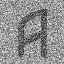

In [15]:
img = cv2.imread("1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = cv2.resize(img, (32,32))
h, w = img.shape
value = 50
Image.fromarray(img)

In [16]:
g = np.zeros((h*w + 2, h*w + 2), dtype = np.float32)
print(g.shape)

(4098, 4098)


In [17]:
g[0, 1:-1] = img.flatten()
g[1:-1, -1] = 255 - img.flatten()
for i in range(h):
    for j in range(w):
        index = j + i*w + 1
        #print(index)
        # left
        if j > 0:
            left_index = j - 1 + i*w + 1
            g[left_index, index] = value
        # right
        if j < w - 1:
            right_index = j + 1 + i*w + 1
            g[right_index, index] = value

---

In [18]:
Vsize = g.shape[0]
F_ = np.zeros((Vsize, Vsize)) # Current flow

In [19]:
start = time()

i = 0
while True:
        F_, end = iteration(g, F_, V)
        if end : break
            
        if i % 100 == 0:
            print('> ', i)
        i += 1
        
print('> ', i)
            
end = time()
print('Time: ', end - start)

c:\users\ocean\appdata\local\programs\python\python38\lib\site-packages\numba\core\ir_utils.py:2031: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'V' of function 'iteration'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-8-1e387879ccfd>", line 2:
@njit
def iteration(G, F, V, _inf=99999999):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


>  0
>  100
>  200
>  300
>  400
>  500
>  600
>  700
>  800
>  900
>  1000
>  1100
>  1200
>  1300
>  1400
>  1500
>  1600
>  1700
>  1800
>  1900
>  2000
>  2100
>  2200
>  2300
>  2400
>  2500
>  2600
>  2700
>  2800
>  2900
>  3000
>  3100
>  3200
>  3300
>  3400
>  3500
>  3600
>  3700
>  3800
>  3900
>  4000
>  4100
>  4200
>  4300
>  4400
>  4500
>  4600
>  4700
>  4800
>  4900
>  4987
Time:  51.47618556022644


In [20]:
print('MaxFlow is: ', sum(F_[:, -1]))

MaxFlow is:  423217.0


---

### MinCut

In [21]:
# BFS
Prev = np.full(Vsize, -1) # Prev node
Q = [0] # Queue
cursor = 0 # instead of popping elements of of the Q

while True:

    v_curr = Q[cursor]
    for v_ind, capacity in enumerate( g[v_curr] ):
        if 0 < F_[v_curr][v_ind] < capacity and Prev[v_ind] == -1 and v_ind != v_curr:
            Q.append(v_ind)
            Prev[v_ind] = v_curr
    
    cursor += 1
    if cursor >= len(Q) : break

In [22]:
res = np.ones((32*32))

for i in range(len(Q[:-1])):
    res[Q[i]] = 0
    
res = np.reshape(res, (32, 32))

IndexError: index 1024 is out of bounds for axis 0 with size 1024

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(res)